# 基于keras认识深度学习
## 为什么选择
- 编程友好：在学习深度学习原理过程中，最好自己代码实践，keras极度适合初学者，能快速实验

## 安装
- Anaconda 和 Jupyter notebook已成为数据分析的标准环境
    1. [anaconda安装](https://www.zhihu.com/question/58033789)
    2. [jupyter notebook安装](https://www.zhihu.com/question/46309360/answer/254638807)
    3. [keras安装](http://keras-cn.readthedocs.io/en/latest/#_2)
    
ps:直接导入环境配置文件，命令`conda env update -f=keras_environment.yml`

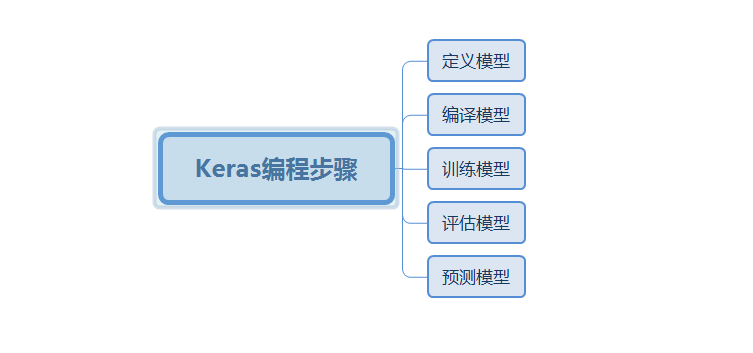

### 定义模型
- Sequential()模型
```
model = Sequential()
model.add(Dense(32, input_shape=(784,)))
model.add(Activation('relu'))
```
- Functional()模型
```
a = Input(shape=(32,))
b = Dense(32)(a)
model = Model(inputs=a, outputs=b)
```
### 编译模型
```
model.compile(optimizer='sgd', loss='mse')
```
必须传入损失函数和优化算法
### 训练模型
```
history = model.fit(X, y, batch_size=10, epochs=100)
```
使用反向传播算法对数据进行训练
### 评估模型
```
loss, accuracy = model.evaluate(X, y)
```
### 模型预测
```
predictions = model.predict(x)
```

## 线性回归
### Keras对波士顿房价进行回归
1. 定义模型假设为`y=Wx+b`
2. 编译模型时选择损失函数为均方误差函数，优化算法选择随机梯度下降
3. 传入数据以及迭代此时
4. 均方误差函数进行评估
5. 进行预测


In [4]:
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
# Boston房屋价格回归数据集
# 每条数据含有13个属性，目标值是该位置房子的房价中位数
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
# 构建模型
# Dense就是常用的全连接层，所实现的运算是output = activation(dot(input, kernel)+bias)
model = Sequential()
model.add(Dense(1,input_dim=13))
# 编译
model.compile(optimizer=SGD(lr=0.01,clipnorm=1),loss='mse',metrics=['mse'])
# 训练
cost = model.fit(x_train,y_train,epochs=20)
# 评估
score = model.evaluate(x_test,y_test)
#预测
y_pred = model.predict(x_test[0:1,:])
print(y_pred)

Epoch 1/20
404/404 [==============================] - 0s 527us/step - loss: 13144.4827 - mean_squared_error: 13144.4827
Epoch 2/20
404/404 [==============================] - 0s 40us/step - loss: 3041.2153 - mean_squared_error: 3041.2153
Epoch 3/20
404/404 [==============================] - 0s 45us/step - loss: 668.1933 - mean_squared_error: 668.1933
Epoch 4/20
404/404 [==============================] - 0s 42us/step - loss: 255.8141 - mean_squared_error: 255.8141
Epoch 5/20
404/404 [==============================] - 0s 40us/step - loss: 185.1011 - mean_squared_error: 185.1011
Epoch 6/20
404/404 [==============================] - 0s 40us/step - loss: 170.2183 - mean_squared_error: 170.2183
Epoch 7/20
404/404 [==============================] - 0s 40us/step - loss: 165.1749 - mean_squared_error: 165.1749
Epoch 8/20
404/404 [==============================] - 0s 37us/step - loss: 161.2603 - mean_squared_error: 161.2603
Epoch 9/20
404/404 [==============================] - 0s 35us/step - loss

### 查看模型

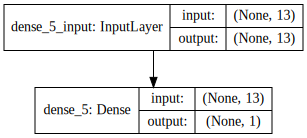

In [5]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))

20/20 [==============================] - 0s 1ms/step


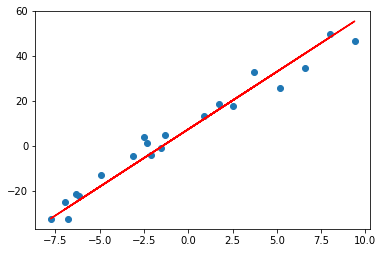

In [6]:
### 单变量线性回归


# 构造数据
x=np.linspace(-10,10,100)
np.random.shuffle(x)
y=5*x+10+np.random.normal(0,5,(100,))#加入噪声
x_train,y_train,x_test,y_test = x[:80],y[:80],x[80:],y[80:]#训练数据与测试数据8：2
# 构建模型
# Dense就是常用的全连接层，所实现的运算是output = activation(dot(input, kernel)+bias)
model = Sequential()
model.add(Dense(1,input_dim=1))
# 编译
model.compile(optimizer='sgd',loss='mse',metrics=['mse'])
# 训练
cost = model.fit(x_train,y_train,epochs=20,verbose=0)
# 评估
score = model.evaluate(x_test,y_test)
#预测
y_pred = model.predict(x_test)
# 可视化
y_pred=model.predict(x_test)
plt.scatter(x_test,y_test,)
plt.plot(x_test,y_pred,'r')
plt.show()

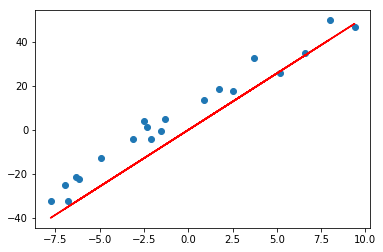

In [7]:
# 正规方程求解(没有添加偏置)
def normal(x, y):
    #theta = np.linalg.inv(X.T@X)@X.T@y#X.T@X等价于X.T.dot(X)
    theta =np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
    return theta

theta=normal(np.array(x_train).reshape(80,1),y_train)
# 可视化
plt.scatter(x_test,y_test)
y_pred= np.array(x_test)*theta
plt.plot(x_test,y_pred,'r')
plt.show()

## 理论


- **假设**\\[{{h}_{\theta }}\left( x \right)={{\theta }_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 
这个公式中有n+1个参数和n个变量，为了使得公式能够简化一些，引入${{x}_{0}}=1$，则公式转化为：  
此时模型中的参数是一个n+1维的向量，任何一个训练实例也都是n+1维的向量，特征矩阵X的维度是 m*(n+1)。 因此公式可以简化为：${{h}_{\theta }}\left( x \right)={{\theta }^{T}}X$，其中上标T代表矩阵转置。

- **代价函数**
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：\\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 

- **优化方法**
    1. 梯度下降
    $${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$
    2. 正规方程 
    
    正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。
 假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，则利用正规方程解出向量 $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。
上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={{X}^{T}}X$，则：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$

    3. 梯度下降与正规方程的比较：

        - 梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型	

        - 正规方程：不需要选择学习率α，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为O(n3)，通常来说当n小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型


## 逻辑回归


In [13]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import keras

## 理论
# sigmoid 函数
g 代表一个常用的逻辑函数（logistic function）为S形函数（Sigmoid function），公式为： \\[g\left( z \right)=\frac{1}{1+{{e}^{-z}}}\\] 
合起来，我们得到逻辑回归模型的假设函数： 
	\\[{{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}\\] 
    
    
# cost function(代价函数)


$$\begin{align}
  & J\left( \theta  \right)=-\frac{1}{m}\sum\limits_{i=1}^{m}{[{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)+\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]} \\ 
 & =\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]} \\ 
\end{align}$$

# gradient descent(梯度下降)
* 这是批量梯度下降（batch gradient descent）  
* 转化为向量化计算： $\frac{1}{m} X^T( Sigmoid(X\theta) - y )$
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$$

## 神经网络


In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import tensorflow as tf
import keras
import numpy as np

C:\Users\DataMesh\Anaconda3\envs\py3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
x_train = np.random.random((1000, 20))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)
x_test = np.random.random((100, 20))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)
print(x_train.shape,y_train.shape)
model = Sequential()

model.add(Dense(64, activation='relu', input_dim=20))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)
model.summary()

(1000, 20) (1000, 10)
Epoch 1/20
1000/1000 [==============================] - 0s 313us/step - loss: 2.3688 - acc: 0.0980
Epoch 2/20
1000/1000 [==============================] - 0s 22us/step - loss: 2.3446 - acc: 0.1000
Epoch 3/20
1000/1000 [==============================] - 0s 20us/step - loss: 2.3213 - acc: 0.1250
Epoch 4/20
1000/1000 [==============================] - 0s 20us/step - loss: 2.3287 - acc: 0.1100
Epoch 5/20
1000/1000 [==============================] - 0s 21us/step - loss: 2.3065 - acc: 0.1140
Epoch 6/20
1000/1000 [==============================] - 0s 20us/step - loss: 2.3219 - acc: 0.1000
Epoch 7/20
1000/1000 [==============================] - 0s 20us/step - loss: 2.3094 - acc: 0.1180
Epoch 8/20
1000/1000 [==============================] - 0s 19us/step - loss: 2.3052 - acc: 0.1100
Epoch 9/20
1000/1000 [==============================] - 0s 19us/step - loss: 2.2990 - acc: 0.1370
Epoch 10/20
1000/1000 [==============================] - 0s 18us/step - loss: 2.2996 - acc: 0.1

- 启动tensorboard，代码中加入
```
tb_cb=keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=1, write_graph=True, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None)
cbks=[];
cbks.append(tb_cb);
model.fit(x_train, y_train,
          epochs=20,
          batch_size=128,
         verbose=0,
          validation_split=0.2,
         callbacks=cbks)
```

## 理论

建立神经网络的主要步骤：

1. 定义模型结构（例如输入特征的数量）
2. 初始化模型的参数
3. 循环：
    - 正向传播（计算当前损失）
    - 反向传播（计算当前梯度）
    - 更新参数（梯度下降）
    
对于每个样本： $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

所有样本代价函数:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$
